In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import warnings
warnings.filterwarnings(action='once')

## Податоци

In [2]:
data = pd.read_csv("../data/data.csv")
data = data.drop(["Unnamed: 0","logPrice"],axis=1)
print("Number of records = " + str(data.shape[0]))
print("Number of features = " + str(data.shape[1]))
data.head()

Number of records = 378
Number of features = 72


/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Micromax,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,0,0,0,0,1,0,0,0,0,0
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
boolean_columns = ['Touchscreen', 'Headphones','Face unlock', 'Fingerprint sensor', 'Wireless charging',
       'NFC', '4G/ LTE', '5G','3G', 'EDGE', 'GPRS', 'Wi-Fi', 'VoLTE', 'Bluetooth', 'GPS', 'FM Radio', 'Fast Charging', 'Removable Battery',
       'Card Slot', 'Light Sensor', 'Compass Sensor', 'Proximity Sensor', 'Magnetic Sensor',
       'Gravity Sensor', 'Heathtracking Sensor', 'Gyroscope Sensor', 'Accelerometar Sensor',
       'Vibration Sensor', 'Laser Sensor']
categorical_columns = ['SIM Type', 'Usb Type', 'OS', 'cpuCores', 'Chipset', 'Flash','Launched_Month', 'Launched_Year']
numerical_columns = ['Battery capacity', 'Screen Size', 'Internal storage','Number of SIMs','Expandable storage', 'Price'
                    ,'CPU', 'RAM', 'Rear Camera', 'Front Camera','PPI','Width', 'Height', 'Weight','Number of Rear Cameras','Resolution_x', 
                     'Resolution_y','logPrice']
brand_columns = ['Brand__Coolpad', 'Brand__Google', 
       'Brand__Huawei', 'Brand__Infinix', 'Brand__LG', 'Brand__Lenovo',
       'Brand__Micromax', 'Brand__Motorola', 'Brand__Nokia', 'Brand__OnePlus',
       'Brand__Oppo',  'Brand__Realme', 'Brand__Samsung',
       'Brand__Tecno', 'Brand__Vivo', 'Brand__Xiaomi','Brand__Apple']

/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
data = data.drop(brand_columns,axis=1)

In [5]:
data.head()

,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Compass Sensor,Proximity Sensor,Magnetic Sensor,Gravity Sensor,Heathtracking Sensor,Gyroscope Sensor,Accelerometar Sensor,Vibration Sensor,Laser Sensor,Manufacturer
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,1,1,0,0,0,1,1,0,0,11
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0


Овие знаеме дека треба да ги тргнеме од визуелизациите

In [6]:
to_remove = ['3G', 'Wi-Fi', 'Bluetooth', 'GPS', 'Proximity Sensor', 'Accelerometar Sensor']
data = data.drop(to_remove,axis=1)
for column in to_remove:
    boolean_columns.remove(column)
print("Removed " + str(len(to_remove)) + " features")
print("Updated number of features = " + str(data.shape[1]))

Removed 6 features
Updated number of features = 49


/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Визуелизации за тергет варијаблата 

16:		84
15:		69
13:		59
12:		49
0:		49
11:		26
9:		13
6:		6
7:		5
10:		5
14:		4
4:		2
3:		2
8:		2
5:		1
1:		1
2:		1


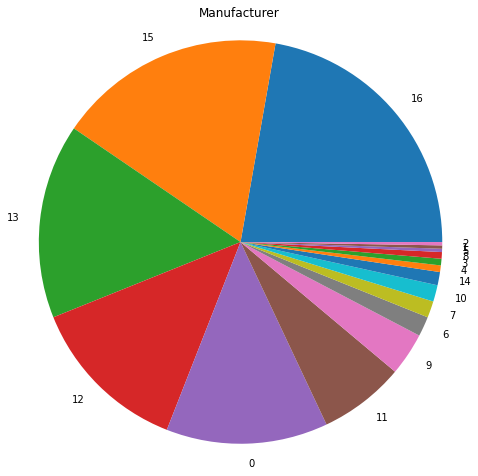

In [7]:
counts = data['Manufacturer'].value_counts()
counts_dict = counts.to_dict()

for key,value in counts_dict.items():
    print(str(key) + ":\t\t" + str(value))

plt.figure(figsize=(8,8))
patches, texts = plt.pie(list(counts_dict.values()),labels=list(counts_dict.keys()))
plt.axis('equal')
plt.title("Manufacturer")
plt.show()

Ги тргаме помалку застапените класи бидејќи немаме доволно податоци за тренирање на нив. Можда пробај да ги ставиш у посебна категорија other 

In [8]:
n = data.shape[0]
data = data.loc[data['Manufacturer'].isin(counts.index[counts > 10])]
print("Removed " + str(n-data.shape[0]) + " records")
print("Updated number of records = " + str(data.shape[0]))

Removed 29 records
Updated number of records = 349


In [9]:
correlated_columns = set()
for i in range(len(data.columns)):
    for j in range(i+1,len(data.columns)):
        correlation = data[data.columns[i]].corr(data[data.columns[j]]) 
        if correlation > 0.6:
            correlated_columns.add(data.columns[i])
            correlated_columns.add(data.columns[j])
correlated_columns = list(correlated_columns)

/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


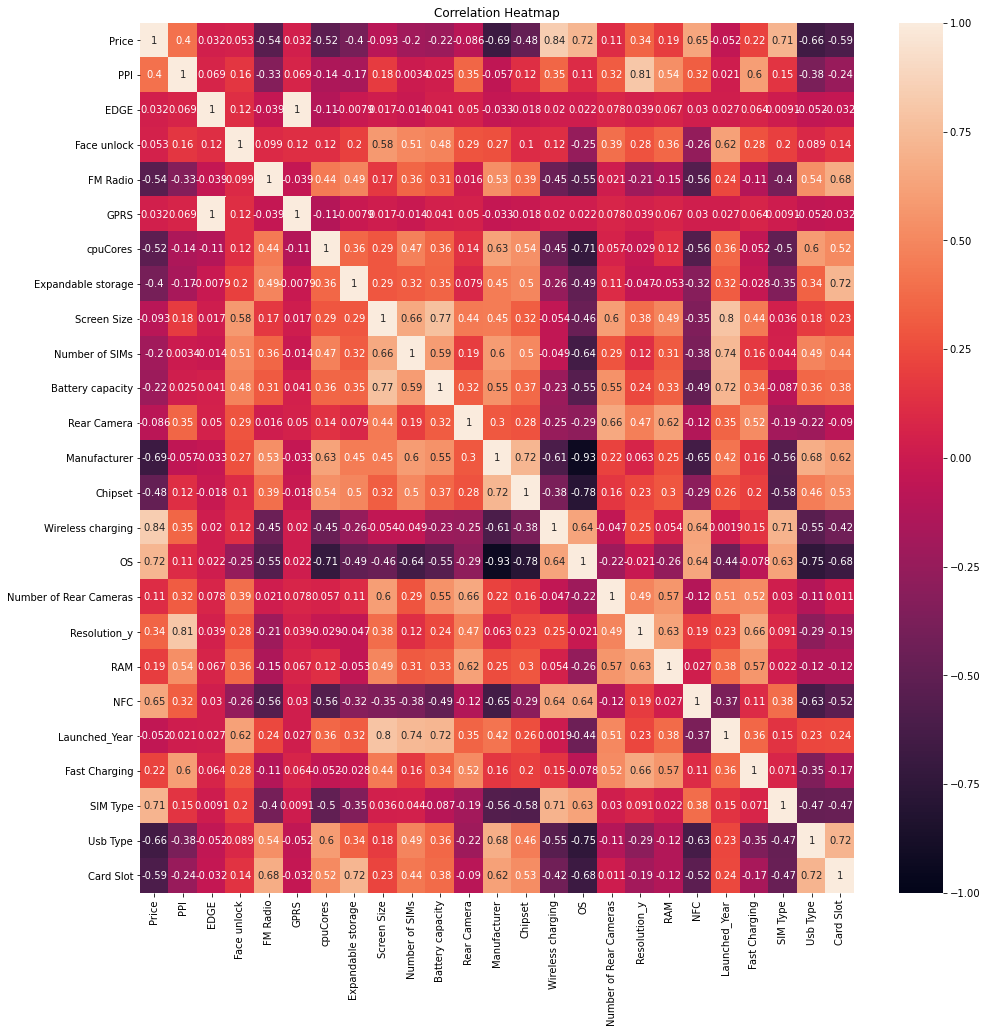

In [10]:
correlated_data = data[correlated_columns]
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(correlated_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})
plt.show()

In [11]:
to_remove = ['EDGE']
data = data.drop(to_remove,axis=1)
boolean_columns.remove('EDGE')
print("Removed " + str(len(to_remove)) + " features")
print("Updated number of features = " + str(data.shape[1]))

Removed 1 features
Updated number of features = 48


## Класификација

In [12]:
features = [x for x in data.columns if x != 'Manufacturer']

In [13]:
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

In [14]:
# X_train will include the validation partition
data_train, data_test = train_test_split(data, test_size=0.1, random_state=42)
print(data_train.shape, data_test.shape)

(314, 48) (35, 48)


/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
def my_cv(data_inner, model, steps=10, use_dim_red=False):
    accuracies = []
    precisions = []
    f1_scores = []
    recalls = []
    folder = StratifiedKFold(n_splits=steps)

    splits = folder.split(data_inner, data_inner['Manufacturer'])
    for train_index, val_index in splits:

        training_data = data_inner.iloc[train_index, :]
        validation_data = data_inner.iloc[val_index, :]

        X_train_inner = training_data.drop(['Manufacturer'], axis=1)
        y_train_inner = training_data['Manufacturer']

        X_val = validation_data.drop(['Manufacturer'], axis=1)
        y_val = validation_data['Manufacturer']

        if use_dim_red:
            fa = FactorAnalysis(n_components=10)
            fa.fit(X_train_inner)
            X_train_inner = fa.transform(X_train_inner)
            X_val = fa.transform(X_val)

        model.fit(X_train_inner, y_train_inner)
        predictions = model.predict(X_val)
        accuracy = accuracy_score(y_val, predictions)
        precision = precision_score(y_val, predictions, average='micro')
        f1 = f1_score(y_val, predictions, average='micro')
        recall = recall_score(y_val, predictions, average='micro')

        accuracies.append(accuracy)
        precisions.append(precision)
        f1_scores.append(f1)
        recalls.append(recall)

    print(f'Accuracy score mean: {np.mean(accuracies)}')
    print(f'Precision score mean: {np.mean(precisions)}')
    print(f'F1 score mean: {np.mean(f1_scores)}')
    print(f'Recall score mean: {np.mean(recalls)}')
    return np.mean(accuracies), np.mean(precisions), np.mean(f1_scores), np.mean(recalls)

In [16]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid', ]:
    print(f"SVC with {kernel} kernel")
    svc = SVC(kernel=kernel, decision_function_shape='ovo', max_iter=-1)
    my_cv(data_train, svc)
    print()

SVC with linear kernel
Accuracy score mean: 0.8536290322580644
Precision score mean: 0.8536290322580644
F1 score mean: 0.8536290322580644
Recall score mean: 0.8536290322580644

SVC with poly kernel
Accuracy score mean: 0.9013104838709678
Precision score mean: 0.9013104838709678
F1 score mean: 0.9013104838709678
Recall score mean: 0.9013104838709678

SVC with rbf kernel
Accuracy score mean: 0.7641129032258065
Precision score mean: 0.7641129032258065
F1 score mean: 0.7641129032258065
Recall score mean: 0.7641129032258065

SVC with sigmoid kernel
Accuracy score mean: 0.37580645161290327
Precision score mean: 0.37580645161290327
F1 score mean: 0.37580645161290327
Recall score mean: 0.37580645161290327



In [17]:
neighbours = range(1, 6)
for neighbour in neighbours:
    print(f"KNN with {neighbour} neighbours")
    knn = KNeighborsClassifier(neighbour)
    my_cv(data_train, knn)
    print()

KNN with 1 neighbours
Accuracy score mean: 0.9425403225806452
Precision score mean: 0.9425403225806452
F1 score mean: 0.9425403225806452
Recall score mean: 0.9425403225806452

KNN with 2 neighbours


/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy score mean: 0.897983870967742
Precision score mean: 0.897983870967742
F1 score mean: 0.897983870967742
Recall score mean: 0.897983870967742

KNN with 3 neighbours
Accuracy score mean: 0.8501008064516128
Precision score mean: 0.8501008064516128
F1 score mean: 0.8501008064516128
Recall score mean: 0.8501008064516128

KNN with 4 neighbours
Accuracy score mean: 0.8273185483870968
Precision score mean: 0.8273185483870968
F1 score mean: 0.8273185483870968
Recall score mean: 0.8273185483870968

KNN with 5 neighbours
Accuracy score mean: 0.792741935483871
Precision score mean: 0.792741935483871
F1 score mean: 0.792741935483871
Recall score mean: 0.792741935483871



In [18]:
depths = range(3, 7)
for d in depths:
    print(f"DecisionTreeClassifier with depth: {d}")
    dtree = DecisionTreeClassifier(max_depth=d)
    my_cv(data_train, dtree)
    print()

DecisionTreeClassifier with depth: 3


/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy score mean: 0.557358870967742
Precision score mean: 0.557358870967742
F1 score mean: 0.557358870967742
Recall score mean: 0.557358870967742

DecisionTreeClassifier with depth: 4
Accuracy score mean: 0.5730846774193549
Precision score mean: 0.5730846774193549
F1 score mean: 0.5730846774193549
Recall score mean: 0.5730846774193549

DecisionTreeClassifier with depth: 5
Accuracy score mean: 0.6943548387096775
Precision score mean: 0.6943548387096775
F1 score mean: 0.6943548387096775
Recall score mean: 0.6943548387096775

DecisionTreeClassifier with depth: 6
Accuracy score mean: 0.7741935483870968
Precision score mean: 0.7741935483870968
F1 score mean: 0.7741935483870968
Recall score mean: 0.7741935483870968



In [19]:
depths = range(3, 7)
n_estimators=range(5, 30, 5)
max_features=range(1, 10)
min_acc = 0
config = dict()
for d in depths:
    for n in n_estimators:
        for m in max_features:
            print(f"RandomForestClassifier with depth: {d}, no. of estimators: {n} and max features: {m}")
            rfc = RandomForestClassifier(max_depth=d, n_estimators=n, max_features=m)
            acc, _, _, _ = my_cv(data_train, rfc)
            if acc > min_acc:
                min_acc = acc
                config['max_depth'] = d
                config['n_estimators'] = n
                config['max_features'] = m
            print()
config

RandomForestClassifier with depth: 3, no. of estimators: 5 and max features: 1


/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy score mean: 0.5496975806451612
Precision score mean: 0.5496975806451612
F1 score mean: 0.5496975806451612
Recall score mean: 0.5496975806451612

RandomForestClassifier with depth: 3, no. of estimators: 5 and max features: 2
Accuracy score mean: 0.6144153225806452
Precision score mean: 0.6144153225806452
F1 score mean: 0.6144153225806452
Recall score mean: 0.6144153225806452

RandomForestClassifier with depth: 3, no. of estimators: 5 and max features: 3
Accuracy score mean: 0.5891129032258065
Precision score mean: 0.5891129032258065
F1 score mean: 0.5891129032258065
Recall score mean: 0.5891129032258065

RandomForestClassifier with depth: 3, no. of estimators: 5 and max features: 4
Accuracy score mean: 0.5983870967741935
Precision score mean: 0.5983870967741935
F1 score mean: 0.5983870967741935
Recall score mean: 0.5983870967741935

RandomForestClassifier with depth: 3, no. of estimators: 5 and max features: 5
Accuracy score mean: 0.646975806451613
Precision score mean: 0.64697

Accuracy score mean: 0.617741935483871
Precision score mean: 0.617741935483871
F1 score mean: 0.617741935483871
Recall score mean: 0.617741935483871

RandomForestClassifier with depth: 3, no. of estimators: 25 and max features: 2
Accuracy score mean: 0.6781250000000001
Precision score mean: 0.6781250000000001
F1 score mean: 0.6781250000000001
Recall score mean: 0.6781250000000001

RandomForestClassifier with depth: 3, no. of estimators: 25 and max features: 3
Accuracy score mean: 0.684475806451613
Precision score mean: 0.684475806451613
F1 score mean: 0.684475806451613
Recall score mean: 0.684475806451613

RandomForestClassifier with depth: 3, no. of estimators: 25 and max features: 4
Accuracy score mean: 0.6814516129032259
Precision score mean: 0.6814516129032259
F1 score mean: 0.6814516129032259
Recall score mean: 0.6814516129032259

RandomForestClassifier with depth: 3, no. of estimators: 25 and max features: 5
Accuracy score mean: 0.6942540322580646
Precision score mean: 0.69425403

Accuracy score mean: 0.7223790322580645
Precision score mean: 0.7223790322580645
F1 score mean: 0.7223790322580645
Recall score mean: 0.7223790322580645

RandomForestClassifier with depth: 4, no. of estimators: 20 and max features: 2
Accuracy score mean: 0.7643145161290323
Precision score mean: 0.7643145161290323
F1 score mean: 0.7643145161290323
Recall score mean: 0.7643145161290323

RandomForestClassifier with depth: 4, no. of estimators: 20 and max features: 3
Accuracy score mean: 0.7960685483870968
Precision score mean: 0.7960685483870968
F1 score mean: 0.7960685483870968
Recall score mean: 0.7960685483870968

RandomForestClassifier with depth: 4, no. of estimators: 20 and max features: 4
Accuracy score mean: 0.7962701612903226
Precision score mean: 0.7962701612903226
F1 score mean: 0.7962701612903226
Recall score mean: 0.7962701612903226

RandomForestClassifier with depth: 4, no. of estimators: 20 and max features: 5
Accuracy score mean: 0.7959677419354839
Precision score mean: 0.

Accuracy score mean: 0.7836693548387097
Precision score mean: 0.7836693548387097
F1 score mean: 0.7836693548387097
Recall score mean: 0.7836693548387097

RandomForestClassifier with depth: 5, no. of estimators: 15 and max features: 2
Accuracy score mean: 0.7961693548387097
Precision score mean: 0.7961693548387097
F1 score mean: 0.7961693548387097
Recall score mean: 0.7961693548387097

RandomForestClassifier with depth: 5, no. of estimators: 15 and max features: 3
Accuracy score mean: 0.8212701612903226
Precision score mean: 0.8212701612903226
F1 score mean: 0.8212701612903226
Recall score mean: 0.8212701612903226

RandomForestClassifier with depth: 5, no. of estimators: 15 and max features: 4
Accuracy score mean: 0.815625
Precision score mean: 0.815625
F1 score mean: 0.815625
Recall score mean: 0.815625

RandomForestClassifier with depth: 5, no. of estimators: 15 and max features: 5
Accuracy score mean: 0.8471774193548386
Precision score mean: 0.8471774193548386
F1 score mean: 0.847177

Accuracy score mean: 0.7800403225806452
Precision score mean: 0.7800403225806452
F1 score mean: 0.7800403225806452
Recall score mean: 0.7800403225806452

RandomForestClassifier with depth: 6, no. of estimators: 10 and max features: 2
Accuracy score mean: 0.8403225806451612
Precision score mean: 0.8403225806451612
F1 score mean: 0.8403225806451612
Recall score mean: 0.8403225806451612

RandomForestClassifier with depth: 6, no. of estimators: 10 and max features: 3
Accuracy score mean: 0.8440524193548387
Precision score mean: 0.8440524193548387
F1 score mean: 0.8440524193548387
Recall score mean: 0.8440524193548387

RandomForestClassifier with depth: 6, no. of estimators: 10 and max features: 4
Accuracy score mean: 0.8662298387096774
Precision score mean: 0.8662298387096774
F1 score mean: 0.8662298387096774
Recall score mean: 0.8662298387096774

RandomForestClassifier with depth: 6, no. of estimators: 10 and max features: 5
Accuracy score mean: 0.8598790322580644
Precision score mean: 0.

{'max_depth': 6, 'n_estimators': 25, 'max_features': 6}

In [20]:
number_estimators = range(50, 100, 5)
l_rates = [1e-4, 1e-3, 1e-2]
min_acc = 0
ada_config = dict()
for n in number_estimators:
    for l in l_rates:
        print(f'AdaBoostClassifier with {n} estimators and learning_rate={l}')
        ada = AdaBoostClassifier(n_estimators=n, learning_rate=l)
        acc, _, _, _ = my_cv(data_train, ada)
        if acc > min_acc:
            ada_config['n_estimators'] = n
            ada_config['learning_rate'] = l
        print()
ada_config

AdaBoostClassifier with 50 estimators and learning_rate=0.0001


/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy score mean: 0.3790322580645161
Precision score mean: 0.3790322580645161
F1 score mean: 0.3790322580645161
Recall score mean: 0.3790322580645161

AdaBoostClassifier with 50 estimators and learning_rate=0.001
Accuracy score mean: 0.490625
Precision score mean: 0.490625
F1 score mean: 0.490625
Recall score mean: 0.490625

AdaBoostClassifier with 50 estimators and learning_rate=0.01
Accuracy score mean: 0.6492943548387098
Precision score mean: 0.6492943548387098
F1 score mean: 0.6492943548387098
Recall score mean: 0.6492943548387098

AdaBoostClassifier with 55 estimators and learning_rate=0.0001
Accuracy score mean: 0.3790322580645161
Precision score mean: 0.3790322580645161
F1 score mean: 0.3790322580645161
Recall score mean: 0.3790322580645161

AdaBoostClassifier with 55 estimators and learning_rate=0.001
Accuracy score mean: 0.490625
Precision score mean: 0.490625
F1 score mean: 0.490625
Recall score mean: 0.490625

AdaBoostClassifier with 55 estimators and learning_rate=0.01
A

{'n_estimators': 95, 'learning_rate': 0.01}

In [21]:
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

models = [
    gnb,
    lda,
    qda
]

names = [
    "GaussianNB",
    "LinearDiscriminantAnalysis",
    "QuadraticDiscriminantAnalysis"
]

for mdl, name in zip(models, names):
    print(f"Model: {name} without dim red")
    my_cv(data_train, mdl)
    print(f"Model: {name} with dim red")
    my_cv(data_train, mdl, use_dim_red=True)
    print()


Model: GaussianNB without dim red
Accuracy score mean: 0.5002016129032257
Precision score mean: 0.5002016129032257
F1 score mean: 0.5002016129032257
Recall score mean: 0.5002016129032257
Model: GaussianNB with dim red


/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy score mean: 0.4967741935483871
Precision score mean: 0.4967741935483871
F1 score mean: 0.4967741935483871
Recall score mean: 0.4967741935483871

Model: LinearDiscriminantAnalysis without dim red
Accuracy score mean: 0.8533266129032258
Precision score mean: 0.8533266129032258
F1 score mean: 0.8533266129032258
Recall score mean: 0.8533266129032258
Model: LinearDiscriminantAnalysis with dim red
Accuracy score mean: 0.5475806451612903
Precision score mean: 0.5475806451612903
F1 score mean: 0.5475806451612903
Recall score mean: 0.5475806451612903

Model: QuadraticDiscriminantAnalysis without dim red
Accuracy score mean: 0.8064516129032258
Precision score mean: 0.8064516129032258
F1 score mean: 0.8064516129032258
Recall score mean: 0.8064516129032258
Model: QuadraticDiscriminantAnalysis with dim red


/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Varia

Accuracy score mean: 0.7298387096774194
Precision score mean: 0.7298387096774194
F1 score mean: 0.7298387096774194
Recall score mean: 0.7298387096774194



/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [22]:
for model, name in zip(models, names):
    print(f"Model: {name}")
    model.fit(data_train[features], data_train['Manufacturer'])
    predictions = model.predict(data_test[features])
    true = data_test['Manufacturer']
    accuracy = accuracy_score(true, predictions)
    precision = precision_score(true, predictions, average='micro')
    f1 = f1_score(true, predictions, average='micro')
    recall = recall_score(true, predictions, average='micro')
    print(f'Accuracy score: {accuracy}')
    print(f'Precision score: {precision}')
    print(f'F1 score: {f1}')
    print(f'Recall score: {recall}')
    print()

Model: GaussianNB
Accuracy score: 0.5714285714285714
Precision score: 0.5714285714285714
F1 score: 0.5714285714285714
Recall score: 0.5714285714285714

Model: LinearDiscriminantAnalysis
Accuracy score: 0.9142857142857143
Precision score: 0.9142857142857143
F1 score: 0.9142857142857143
Recall score: 0.9142857142857143

Model: QuadraticDiscriminantAnalysis
Accuracy score: 0.9714285714285714
Precision score: 0.9714285714285714
F1 score: 0.9714285714285714
Recall score: 0.9714285714285714



/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [23]:
X = data.drop(['Manufacturer'], axis=1)
y = data['Manufacturer']

/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


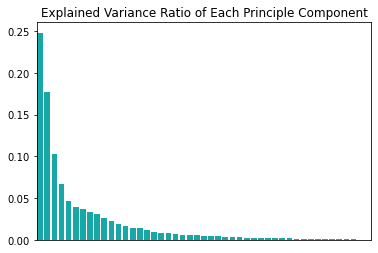

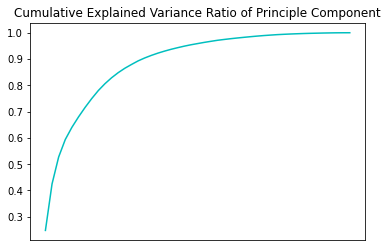

Cumulative variance of 80% reached at component 9


In [25]:
pca = PCA(n_components = None)
pca.fit(X)
X_pca = pca.transform(X)

plt.figure()
sns.barplot(x=np.arange(X.shape[1]),y=pca.explained_variance_ratio_, color="c")
plt.xticks([])
plt.title("Explained Variance Ratio of Each Principle Component")
plt.show()

plt.figure()
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(X.shape[1]),cumulative_explained_variance, color="c")
plt.xticks([])
plt.title("Cumulative Explained Variance Ratio of Principle Component")
plt.show()
res = list(map(lambda i: i> 0.8, cumulative_explained_variance)).index(True) 
print("Cumulative variance of 80% reached at component", res)

In [26]:
pca = PCA(n_components = 9)
pca.fit(X)
X_pca = pca.transform(X)

/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
gnb = GaussianNB() 
scores = cross_val_score(gnb, X_pca, y, cv=10)
print(scores.mean())
print(scores.std())

0.5440336134453782
0.11987576837978449


/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lda, X_pca, y, cv=10)
print(scores.mean())
print(scores.std())

/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5273949579831931
0.11306265975430689


In [29]:
qda = QuadraticDiscriminantAnalysis()
scores = cross_val_score(qda, X_pca, y, cv=10)
print(scores.mean())
print(scores.std())

0.6163025210084034
0.1441308517360018


/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/oliver/anaconda3/envs/dm/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
